# ADULT DATA SET 

14 zmiennych:

- Age - wiek<br>
- Workclass - rodzaj zatrudnienia<br>
- fnlwgt - Final Weight - sampling weight - waga próbki pokazująca jaką cześć populacji reprezentuje dana obserwacja<br>
- Education - poziom edukacji<br>
- Education Number of Years - edukacja numerycznie<br>
- Marital-status - stan cywilny<br>
- Occupation - zatrudnienie<br>
- Relationship - typ relacji<br>
- Race - rasa/kolor skóry<br>
- Sex - płeć<br>
- Capital-gain - uzyskane zyski ze źródeł innych niż pensja<br>
- Capital-loss - straty kapitału<br>
- Hours-per-week - liczba godziń przepracowanych w tygodniu<br>
- Native-country - kraj pochodzenia<br>
<br>
Oraz zmienna celu, czyli kolumna 50k+, która pokazuje czy osoba zarabia więcej czy mniej niż 50k USD w ciągu roku. Zmienna ta przyjmuje 2 wartości (<=50k dla osób zarabiających nie więcej niż 50k $ rocznie oraz >50k dla osób zarabiających powyżej 50 tysięcy dolarów rocznie). Zmienna celu przyjmuje dwie wartości co powoduje, że jej predykcja jest zadaniem klasyfikacji binarnej. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

# WCZYTYWANIE DANYCH ORAZ UZUPEŁNIANIE BRAKUJĄCYCH DANYCH

In [4]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, delimiter=' *, *', engine='python')
df_test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, delimiter=' *, *', engine='python')

In [5]:
col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
             'race','sex','capital-gain','capital-loss','hours-per-week','native-country','50k+']

In [6]:
df.columns = col_names
df_test.columns = col_names

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k+
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  50k+            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50k+              0
dtype: int64

In [11]:
for col in col_names:
    print(col.upper(), df[col].unique())

AGE [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
WORKCLASS ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
FNLWGT [ 77516  83311 215646 ...  34066  84661 257302]
EDUCATION ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
EDUCATION-NUM [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
MARITAL-STATUS ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
OCCUPATION ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-

***
Brakujące dane zostały oznaczone za pomocą <font color=blue>'?'</font><br>
Następnie sprawdzono ile danych brakuje w konkretnych kolumnach oraz czy braki tych danych znajdują się <br>
w tych samych obserwacjach
***

In [12]:
df[df=='?'].count()

C:\Users\Tomasz\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
50k+                 0
dtype: int64

In [13]:
df_na = df[(df['workclass']=='?') | (df['occupation']=='?')]
len(df_na)

1843

In [14]:
df_na = df[(df['workclass']=='?') | (df['occupation']=='?') | (df['native-country']=='?')]
len(df_na)

2399

***
Zdecydowano na uzupełnienie brakujących danych za pomocą poprzedniej obserwacji (ffill).<br>
W celu zweryfikowania czy po imputacji brakujących danych znacząco nie zmienił się udział<br>
wybranych kategorii, porównano udziały procentowe w modyfikowanych kolumnach przed i po zabiegu.
***

In [15]:
df_no_nan = df[(df['workclass']!='?') & (df['occupation']!='?') & (df['native-country']!='?')]

In [16]:
df_no_nan['workclass'].value_counts(normalize=True)

Private             0.738877
Self-emp-not-inc    0.082853
Local-gov           0.068530
State-gov           0.042404
Self-emp-inc        0.035608
Federal-gov         0.031265
Without-pay         0.000464
Name: workclass, dtype: float64

In [17]:
df_no_nan['occupation'].value_counts(normalize=True)

Prof-specialty       0.133877
Craft-repair         0.133612
Exec-managerial      0.132352
Adm-clerical         0.123367
Sales                0.118825
Other-service        0.106492
Machine-op-inspct    0.065181
Transport-moving     0.052119
Handlers-cleaners    0.044758
Farming-fishing      0.032790
Tech-support         0.030237
Protective-serv      0.021351
Priv-house-serv      0.004741
Armed-Forces         0.000298
Name: occupation, dtype: float64

In [18]:
df_no_nan['native-country'].value_counts(normalize=True).head(5)

United-States    0.911876
Mexico           0.020224
Philippines      0.006233
Germany          0.004244
Puerto-Rico      0.003614
Name: native-country, dtype: float64

***
Usuwanie duplikatów i uzupełnianie brakujących danych za pomocą poprzedniej obserwacji.
***

In [19]:
df.drop_duplicates(inplace = True)
df.replace('?', np.nan, inplace = True)
df.fillna(method = 'ffill', inplace = True)

In [20]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50k+              0
dtype: int64

In [21]:
df['workclass'].value_counts(normalize=True)

Private             0.739835
Self-emp-not-inc    0.082552
Local-gov           0.067738
State-gov           0.042229
Self-emp-inc        0.036174
Federal-gov         0.030796
Without-pay         0.000461
Never-worked        0.000215
Name: workclass, dtype: float64

In [22]:
df['occupation'].value_counts(normalize=True)

Prof-specialty       0.134708
Craft-repair         0.133940
Exec-managerial      0.132618
Adm-clerical         0.122322
Sales                0.118726
Other-service        0.106556
Machine-op-inspct    0.065525
Transport-moving     0.052340
Handlers-cleaners    0.045179
Farming-fishing      0.031841
Tech-support         0.030120
Protective-serv      0.020991
Priv-house-serv      0.004825
Armed-Forces         0.000307
Name: occupation, dtype: float64

In [23]:
df['native-country'].value_counts(normalize=True).head(5)

United-States    0.912069
Mexico           0.020069
Philippines      0.006147
Germany          0.004334
Canada           0.003811
Name: native-country, dtype: float64

# Zmiana typu zmiennych

W celach wykorzystania zbioru danych do budowania modelu klasyfikacji binarnej przeprowadzono <br>
zmianę zmiennych słownych na liczbowe. W tym celu przypisano każdej unikalnej kategorii liczbę naturalną.<br>
Rozpoczęto od wypisania wszystkich unikalnych wartości osiąganych w kolumnach typu 'object' (słownych).

In [24]:
for col in col_names:
    if df[col].dtype ==object:
        print(col.upper(), df[col].unique())

WORKCLASS ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
EDUCATION ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
MARITAL-STATUS ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
OCCUPATION ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
RELATIONSHIP ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
RACE ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
SEX ['Male' 'Female']
NATIVE-COUNTRY ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'I

In [25]:
for col in col_names:
    print(col, df[col].nunique())

age 73
workclass 8
fnlwgt 21648
education 16
education-num 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
capital-gain 119
capital-loss 92
hours-per-week 94
native-country 41
50k+ 2


***
Początkowo sprawdzono ile unikalnych wartości posiadają dane kolumny, by upewnić się, że proces mapowania<br>
przebiegł pomyślnie. Poniższy kod zmienia wartości słowne na liczbowe w odpowiednich kolumnach. 
***

In [26]:
#sex
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)

#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

#marital-status
df['marital-status'] = df['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 
'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,
                                       'Private': 5, 'Self-emp-not-inc': 6, 'Never-worked': 7}).astype(int)

#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5,
   '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,
    'Bachelors': 12, '10th': 13,'Assoc-voc': 14, '9th': 15}).astype(int)

#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 
                    'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,
                                             'Own-child': 5}).astype(int)

#native-country
df['native-country'] = df['native-country'].map({'United-States': 0, 'Cuba': 1, 'Jamaica': 2, 'India': 3, 'Mexico': 4,
'South': 5, 'Puerto-Rico': 6, 'Honduras': 7, 'England': 8, 'Canada': 9, 'Germany': 10, 'Iran': 11, 'Philippines': 12,
'Italy': 13, 'Poland': 14, 'Columbia': 15, 'Cambodia': 16, 'Thailand': 17, 'Ecuador': 18, 'Laos': 19, 'Taiwan': 20, 
'Haiti': 21, 'Portugal': 22, 'Dominican-Republic': 23, 'El-Salvador': 24, 'France': 25, 'Guatemala': 26, 'China': 27,
'Japan': 28, 'Yugoslavia': 29, 'Peru': 30, 'Outlying-US(Guam-USVI-etc)': 31, 'Scotland': 32, 'Trinadad&Tobago': 33,
'Greece': 34, 'Nicaragua': 35, 'Vietnam': 36, 'Hong': 37, 'Ireland': 38, 'Hungary': 39, 'Holand-Netherlands': 40}).astype(int)

#50k+
df['50k+'] = df['50k+'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [27]:
for col in col_names:
    print(col, df[col].nunique())

age 73
workclass 8
fnlwgt 21648
education 16
education-num 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
capital-gain 119
capital-loss 92
hours-per-week 94
native-country 41
50k+ 2


In [28]:
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int32
50k+              int32
dtype: object

# EDA - Exploratory data analysis

In [29]:
df.groupby('education-num').mean()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k+
education-num,,,,,,,,,,,,,,
1,43.200000,4.840000,235739.800000,1.0,3.100000,7.420000,2.100000,2.420000,0.320000,916.360000,67.820000,36.380000,8.280000,0.000000
2,46.397590,4.921687,239824.795181,8.0,2.596386,7.891566,2.518072,2.620482,0.265060,127.391566,48.909639,38.234940,7.481928,0.036145
3,42.945783,4.873494,232425.174699,2.0,2.807229,7.683735,2.710843,2.668675,0.253012,176.551205,68.457831,38.849398,5.828313,0.048193
4,48.444961,4.871318,188322.291473,6.0,2.644961,7.772093,2.911628,2.693023,0.248062,234.302326,65.770543,39.365891,2.480620,0.062016
5,41.060311,4.848249,202485.066148,15.0,3.138132,8.243191,2.916342,2.439689,0.280156,342.089494,28.998054,38.044747,2.665370,0.052529
6,37.429796,4.816720,196832.465166,13.0,3.396570,8.448017,3.034298,2.551983,0.316184,404.574491,56.845659,37.052519,1.097535,0.066452
7,32.355745,4.841702,194928.077447,11.0,3.693617,8.432340,3.349787,2.577021,0.367660,215.097872,50.079149,33.925957,1.104681,0.051064
8,32.000000,4.757506,199097.508083,5.0,3.759815,8.233256,3.140878,2.452656,0.332564,284.087760,32.337182,35.780600,1.454965,0.076212
9,38.978178,4.704974,189542.362302,3.0,3.170574,7.738994,2.843530,2.625500,0.322851,577.184868,70.513627,40.574995,0.917000,0.159520


In [30]:
df.groupby('50k+').mean()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
50k+,,,,,,,,,,,,,,
0,36.787392,4.662442,190345.926796,5.232569,9.596081,3.531258,7.426431,2.690947,2.607256,0.388007,148.884970,53.190258,38.842862,1.240181
1,44.250925,4.287664,188000.480674,6.547519,11.612195,2.300038,7.003955,3.249394,2.782880,0.150402,4007.164562,195.051282,45.473402,0.929073


***
Już po wstępnej analizie można zaobserwować, że większe zarobki osiągają ludzie o wyższej średniej wieku oraz o lepszym wykształceniu
***

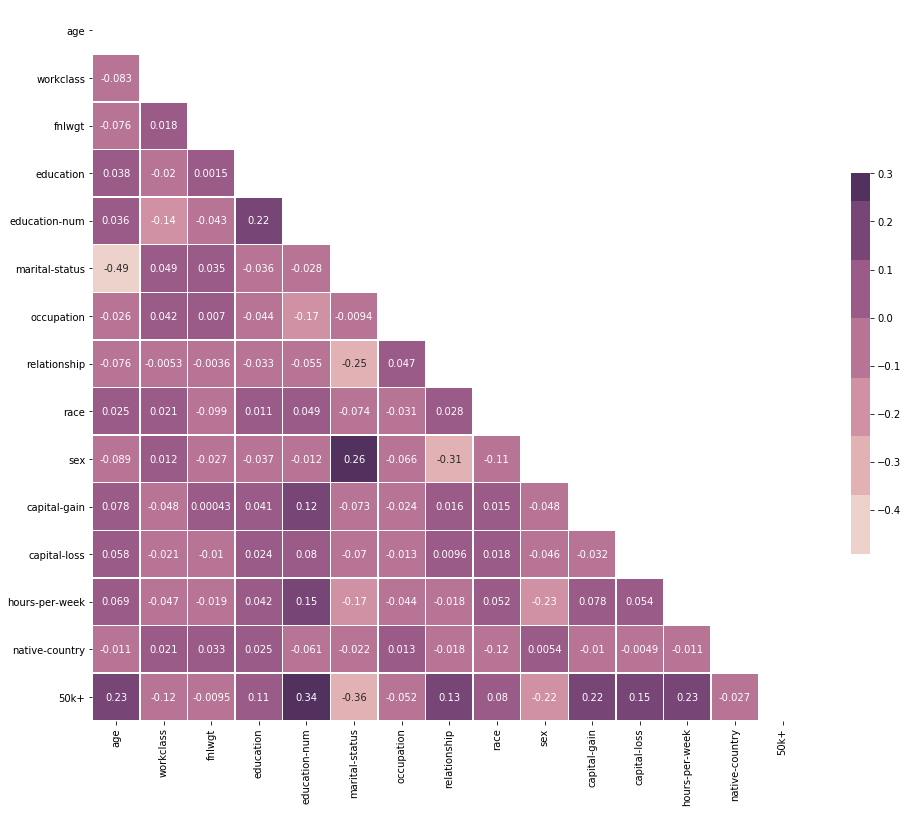

In [31]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(16, 14))
cmap = sns.cubehelix_palette(8)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

***
Zmienna celu jest dość mocno skorelowana z pozostałymi zmiennymi, szczególnie z: age, education-num, marital-status, <br>capital-gain oraz hours-per-week.
***

# Płeć

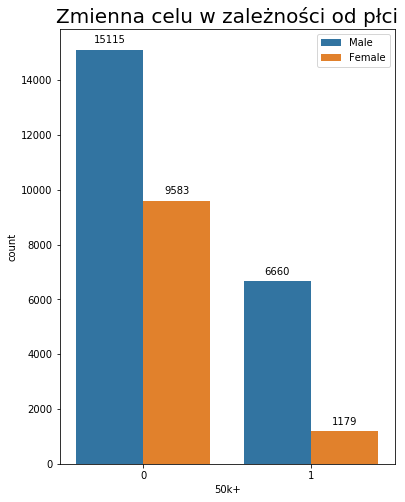

In [32]:
plt.figure(figsize=(6, 8))
splot = sns.countplot(df['50k+'], hue = df['sex'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Zmienna celu w zależności od płci', size = 20)
plt.legend(labels=['Male','Female'])

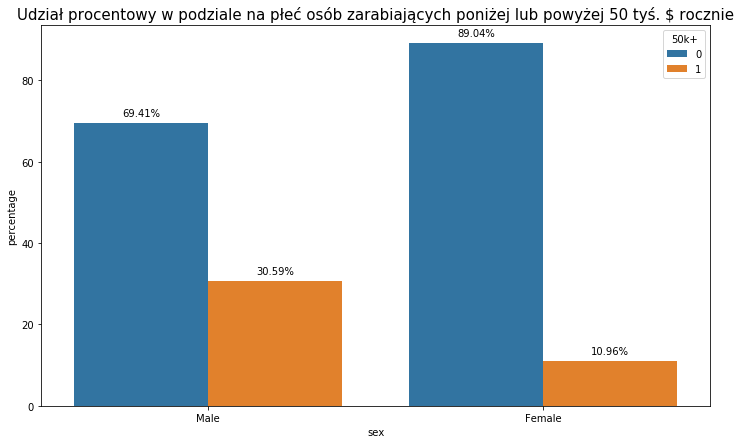

In [33]:
plt.figure(figsize=(12,7))
percentage = df.groupby('sex')['50k+'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
p = sns.barplot(x="sex", y="percentage", hue="50k+", data=percentage)
p.set_xticklabels(['Male','Female'])
plt.title('Udział procentowy w podziale na płeć osób zarabiających poniżej lub powyżej 50 tyś. $ rocznie', size = 15)
for a in p.patches:
        percentage = '{:.2f}%'.format(a.get_height())
        x = a.get_x() + a.get_width() / 2.
        y = a.get_height()
        p.annotate(percentage, (x, y), ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

***
W analizowanym zbiorze jest zdecydowanie więcej mężczyzn i prawie 3-krotnie większy odesetek mężczyzn niż kobiet osiąga zarobki <br>przekraczajaće 50 tyś $/rok.
***

# Wykształcenie

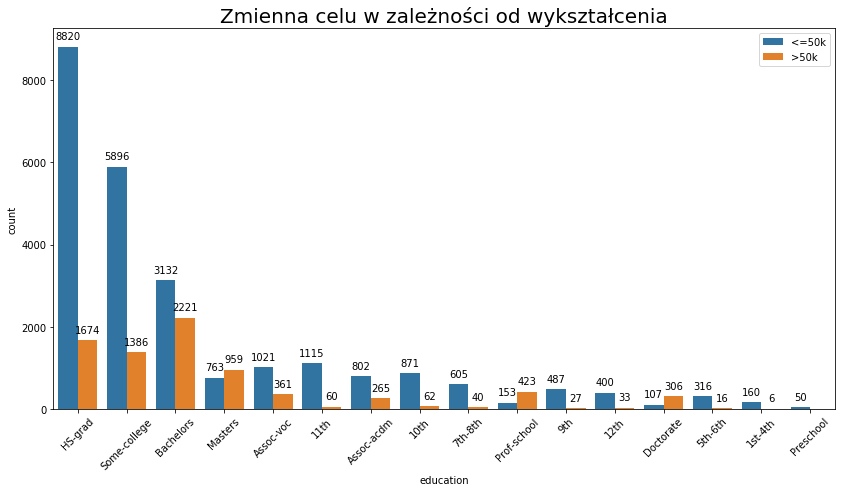

In [34]:
order = df.groupby('education').count().sort_values('age', ascending=False)['age'].index
plt.figure(figsize=(14,7))
splot = sns.countplot(df['education'], hue = df['50k+'], order = order)
plt.xticks(rotation=45)
plt.legend(loc='upper right', labels = ['<=50k','>50k'])
plt.title('Zmienna celu w zależności od wykształcenia', size = 20)
splot.set_xticklabels(['HS-grad','Some-college', 'Bachelors','Masters','Assoc-voc','11th','Assoc-acdm','10th','7th-8th','Prof-school','9th',
 '12th','Doctorate','5th-6th','1st-4th','Preschool'])
for p in splot.patches:
    percentage = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    splot.annotate(percentage, (x,y), ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

Text(0.5, 1.0, 'Stopień edukacji')

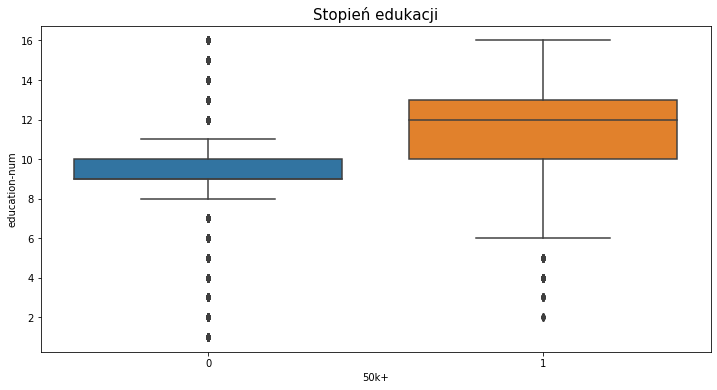

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['50k+'], y=df['education-num'])
plt.title('Stopień edukacji', size = 15)

***
Im wyższe wykształcenie tym lepsze zarobki. Jedynie 3 kategorie wykształcenia charakteryzują się<br>
wiekszym odsetkiem ludzi zarabiających powyżej 50 tyś $ rocznie. Są to: Masters, Prof-school oraz Doctorate.<br>
Ponadto, na wykresie pudełkowym można zaobserować, że dla osób zarabiających powyżej 50k niska edukacja <br>
jest wartością odstającą, czyli takich przypadków jest bardzo niewiele. Podobnie jest w wypadku osób<br>
zarabiających poniżej 50k, dla nich wysoka edukacja (od tytułu Bachelors) jest wartością odstającą.
***

# Stan cywilny

Text(0.5, 1.0, 'Zarobki w zależności od stanu cywilnego')

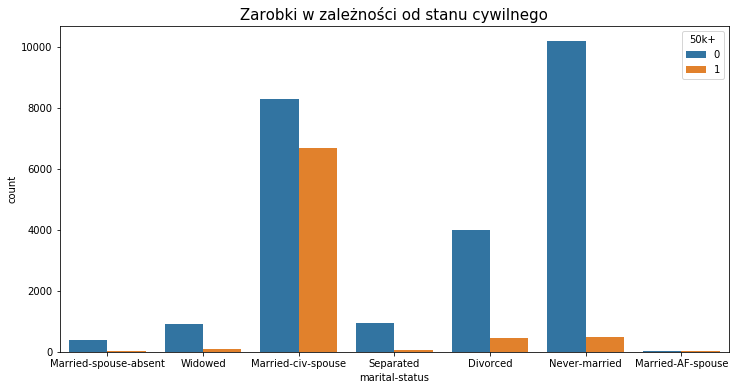

In [36]:
plt.figure(figsize=(12,6))
splot = sns.countplot(x=df['marital-status'], hue = df['50k+'])
splot.set_xticklabels(['Married-spouse-absent', 'Widowed', 'Married-civ-spouse', 
'Separated', 'Divorced','Never-married', 'Married-AF-spouse'])
plt.title('Zarobki w zależności od stanu cywilnego', size =15)

In [37]:
df.groupby('marital-status').mean()['age']

marital-status
0    40.578947
1    58.975831
2    43.247361
3    39.354146
4    43.042783
5    28.150558
6    32.478261
Name: age, dtype: float64

***
Najwięcej osób zarabiających powyżej 50k jest w związku małżeńskim. Osoby, które nie były nigdy w związku małżeńskim<br>
wyrózniają się największą liczbą osób zarabiających poniżej 50k. Należy wziąć pod uwagę, że do tej grupy<br>
należą osoby młode (średnia wieku 28 lat), które mogą być jeszcze w trakcie edukacji.
***

# Wiek

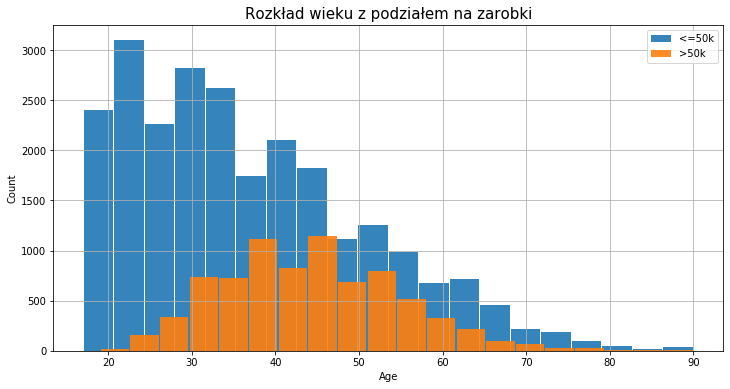

In [38]:
plt.figure(figsize=(12,6))
df[df['50k+']==0]['age'].hist(bins=20, rwidth=0.96, alpha = 0.9, label = '<=50k')
df[df['50k+']==1]['age'].hist(bins=20, rwidth=0.96, alpha = 0.9, label = '>50k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Rozkład wieku z podziałem na zarobki', size = 15)
plt.legend()

***
Najwięcej osób przekraczających próg 50k $/rok jest w wieku około 45 lat.<br>
Wraz z wiekiem spada liczba osób o niższych zarobkach.
***

# Liczba godzin pracy

Text(0.5, 1.0, 'Liczba godzin pracy w tygodniu')

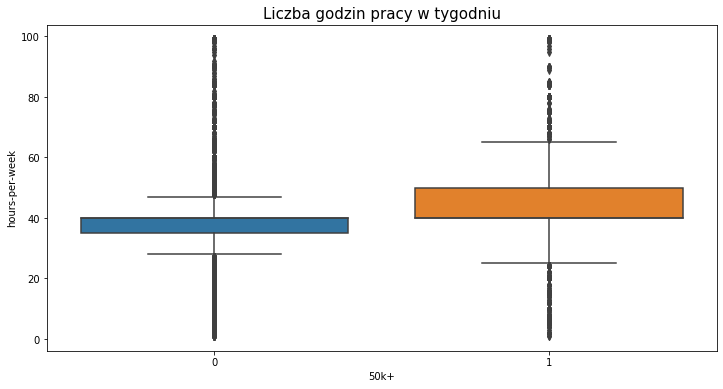

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['50k+'], y=df['hours-per-week'])
plt.title('Liczba godzin pracy w tygodniu', size = 15)

Text(0.5, 1.0, 'Rozkład godzin pracy w tygodniu')

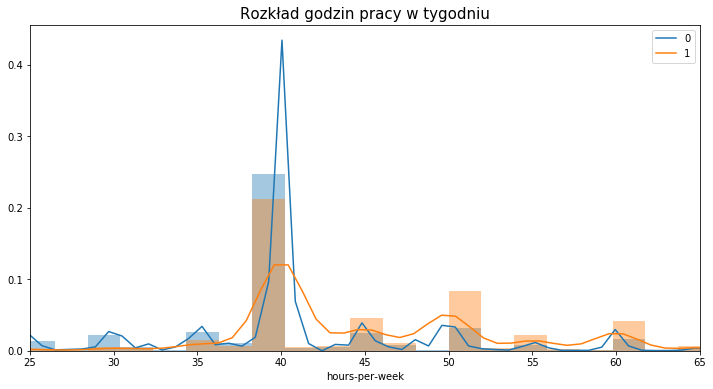

In [40]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['50k+'] == 0]['hours-per-week'], kde_kws={"label": "0"})
sns.distplot(df[df['50k+'] == 1]['hours-per-week'], kde_kws={"label": "1"})
plt.xlim(25,65)
plt.title('Rozkład godzin pracy w tygodniu', fontsize=15)

In [41]:
df.groupby('50k+').mean()['hours-per-week']

50k+
0    38.842862
1    45.473402
Name: hours-per-week, dtype: float64

***
Osoby zarabiające powyżej 50k pracują średnio o prawie 7 godzin tygodniowo więcej.
***

# Rasa

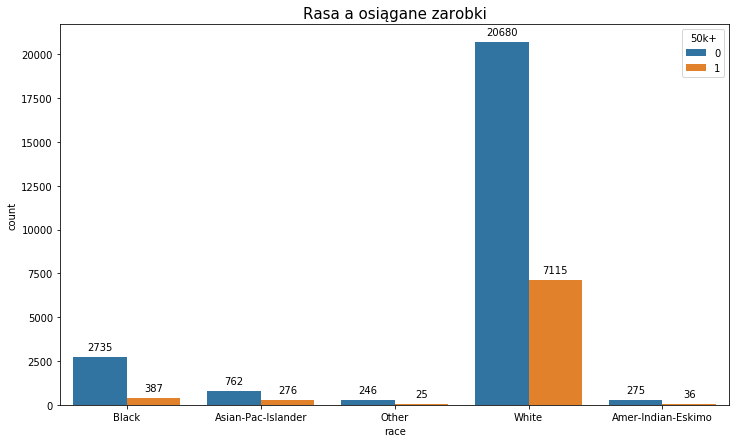

In [42]:
plt.figure(figsize=(12,7))
splot = sns.countplot(df['race'], hue=df['50k+'])
splot.set_xticklabels(['Black', 'Asian-Pac-Islander','Other', 'White', 'Amer-Indian-Eskimo'])
plt.title('Rasa a osiągane zarobki', size = 15)
for p in splot.patches:
    percentage = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    splot.annotate(percentage, (x, y), ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

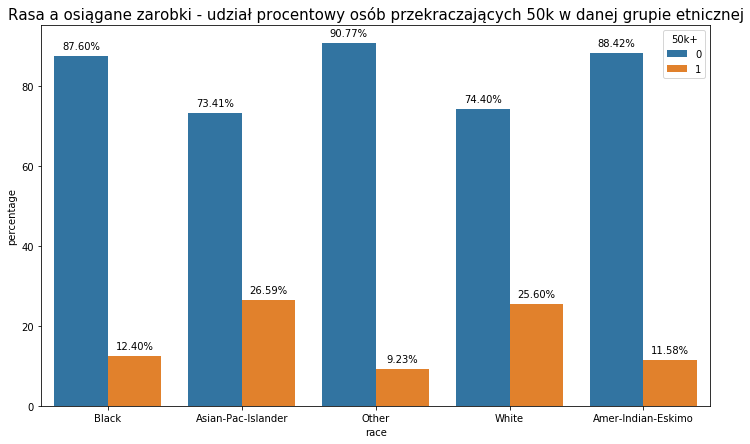

In [43]:
plt.figure(figsize=(12,7))
percentage = df.groupby('race')['50k+'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
splot = sns.barplot(x = percentage['race'], y = percentage['percentage'], hue=percentage['50k+'])
splot.set_xticklabels(['Black', 'Asian-Pac-Islander','Other', 'White', 'Amer-Indian-Eskimo'])
plt.title('Rasa a osiągane zarobki - udział procentowy osób przekraczających 50k w danej grupie etnicznej', size = 15)
for p in splot.patches:
    percentagee = '{:.2f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    splot.annotate(percentagee, (x, y), ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

***
W analizowanym zbiorze największą grupę tworzą ludzie rasy białej. Na drugim wykresie przedstawiono <br>
udział procentowy osób przekraczających 50k w danej grupie etnicznej. Największym odsetkiem wyróżniają się <br>
dwie rasy: azjatycka oraz biała. 
***

# Budowa modelu

***
Zdecydowano na usunięcie kolumn:<br>
- education, ponieważ przedstawia te same informacje, które są zawarte w education_num, <br>
- native-country, w zdecydowanej większości (ponad 90%) obserwacji pochodzi z USA, a w zbiorze znajduje się aż 41 pozycji, może mieć to negatywny wpływ na dokładność modelu, <br>
***

***
Na początku należy przygotować zbiór danych test, tak jak to miało miejsce ze zbiorem danych train.
***

In [44]:
df_test.drop_duplicates(inplace = True)
df_test.replace('?', np.nan, inplace = True)
df_test.fillna(method = 'ffill', inplace = True)

In [45]:
#sex
df_test['sex'] = df_test['sex'].map({'Male': 0, 'Female': 1}).astype(int)

#race
df_test['race'] = df_test['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

#marital-status
df_test['marital-status'] = df_test['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 
'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

#workclass
df_test['workclass'] = df_test['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,
                                       'Private': 5, 'Self-emp-not-inc': 6, 'Never-worked': 7}).astype(int)

#education
df_test['education'] = df_test['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5,
   '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,
    'Bachelors': 12, '10th': 13,'Assoc-voc': 14, '9th': 15}).astype(int)

#occupation
df_test['occupation'] = df_test['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 
                    'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

#relationship
df_test['relationship'] = df_test['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,
                                             'Own-child': 5}).astype(int)

#native-country
df_test['native-country'] = df_test['native-country'].map({'United-States': 0, 'Cuba': 1, 'Jamaica': 2, 'India': 3, 'Mexico': 4,
'South': 5, 'Puerto-Rico': 6, 'Honduras': 7, 'England': 8, 'Canada': 9, 'Germany': 10, 'Iran': 11, 'Philippines': 12,
'Italy': 13, 'Poland': 14, 'Columbia': 15, 'Cambodia': 16, 'Thailand': 17, 'Ecuador': 18, 'Laos': 19, 'Taiwan': 20, 
'Haiti': 21, 'Portugal': 22, 'Dominican-Republic': 23, 'El-Salvador': 24, 'France': 25, 'Guatemala': 26, 'China': 27,
'Japan': 28, 'Yugoslavia': 29, 'Peru': 30, 'Outlying-US(Guam-USVI-etc)': 31, 'Scotland': 32, 'Trinadad&Tobago': 33,
'Greece': 34, 'Nicaragua': 35, 'Vietnam': 36, 'Hong': 37, 'Ireland': 38, 'Hungary': 39, 'Holand-Netherlands': 40}).astype(int)

#50k+
df_test['50k+'] = df_test['50k+'].map({'<=50K.': 0, '>50K.': 1}).astype(int)

In [46]:
#drop education i native-country
df.drop(['education', 'native-country'], axis = 1, inplace = True)
df_test.drop(['education', 'native-country'], axis = 1, inplace = True)

In [47]:
X_train = df.drop('50k+', axis = 1).values
y_train = df['50k+'].values
X_test = df_test.drop('50k+', axis = 1).values
y_test = df_test['50k+'].values

***
Zbiory zostały podzielone na X_train, X_test oraz y_train i y_test.
***

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32537, 12) (16275, 12) (32537,) (16275,)


# Importowanie potrzebnych funkcji

In [263]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

***
Ze względu na dużą czułośc szczególnie Regresji Logistycznej i metody K-Najbliższych sąsiadów <br>
zdecydowano się na standaryzacje danych za pomocą narzędzia StandardScaler.
***

# KNeighbors

In [212]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn_default = knn.predict(X_test)
print('KNN-Default accuracy: ', accuracy_score(y_test, y_pred_knn_default))

KNN Default accuracy:  0.8335483870967741


In [288]:
n_neighbors = np.array(range(2,61))
accuracy = []
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    accuracy.append(score)
#print(accuracy)
index = accuracy.index(max(accuracy)) + 2
knn_best_n = KNeighborsClassifier(n_neighbors=index)
knn_best_n.fit(X_train, y_train)
y_pred_knn_best = knn_best_n.predict(X_test)
print('KNN-tuning accuracy: ', accuracy_score(y_test, y_pred_knn_best))

[0.821689708141321, 0.8235330261136713, 0.8321351766513057, 0.8335483870967741, 0.8351459293394777, 0.8365591397849462, 0.8382181259600614, 0.8395084485407066, 0.8412903225806452, 0.8389554531490016, 0.8413517665130569, 0.83963133640553, 0.83963133640553, 0.8392626728110599, 0.842457757296467, 0.8400614439324117, 0.8410445468509985, 0.8403072196620583, 0.8410445468509985, 0.8400614439324117, 0.8401843317972351, 0.8401843317972351, 0.840552995391705, 0.8409216589861751, 0.8414746543778802, 0.8408602150537634, 0.8407373271889401, 0.8407373271889401, 0.8407373271889401, 0.8407987711213518, 0.8413517665130569, 0.8409831029185868, 0.8418433179723502, 0.8413517665130569, 0.8421505376344086, 0.8413517665130569, 0.8428264208909371, 0.8422734254992319, 0.843195084485407, 0.8425806451612903, 0.8420276497695852, 0.8414746543778802, 0.8422119815668203, 0.8416589861751153, 0.8420276497695852, 0.8411674347158218, 0.8415360983102919, 0.8407987711213518, 0.8414132104454685, 0.8412288786482335, 0.84061

In [261]:
print(classification_report(y_test, y_pred_knn_best))
print('Confusion_matrix: \n',confusion_matrix(y_test,y_pred_knn_best))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12429
           1       0.71      0.56      0.63      3846

    accuracy                           0.84     16275
   macro avg       0.79      0.75      0.76     16275
weighted avg       0.84      0.84      0.84     16275

Confusion_matrix: 
 [[11560   869]
 [ 1683  2163]]


Text(0.5, 1.0, 'Accuracy dla KNeighbors w zależności od n')

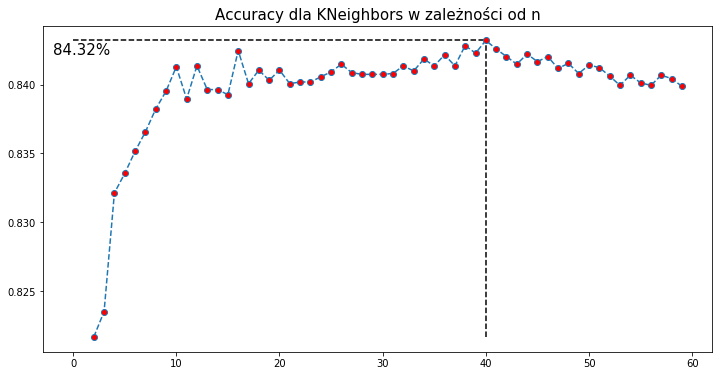

In [170]:
x = np.array(range(len(accuracy)))+2
y = accuracy
plt.figure(figsize=(12,6))
plt.plot(x, y, linestyle='--', marker = 'o', markerfacecolor='red')
plt.vlines(x=index, ymin=min(y), ymax=max(y), linestyle='--')
plt.hlines(y=max(y), xmin=0, xmax=index, linestyle='--')
plt.annotate(s=((((max(y)*100).round(2)).astype('str'))+'%'), xy=(-2,max(y)-0.001), fontsize=15)
plt.title('Accuracy dla KNeighbors w zależności od n', fontsize=15)

***
Pierwszy zbudowany model to model K-Najbliższych sąsiadów. Dla znalezienia optymalnej liczby sąsiadów (n_neighbors)<br>
zastosowano pętle budująca model dla wszystkich wartości od 2 do 60. Model z n_neighbors równym 40 osiągnął największą <br>
dokładność predykcji wynoszącą 84.32% na zbiorze testowym.
***

# Regresja Logistyczna

In [239]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred_reg_default = reg.predict(X_test)
print('LogisticRegression-default accuracy: ', accuracy_score(y_test,y_pred_reg_default))

LogisticRegression-default accuracy:  0.8347772657450077


In [240]:
#Tuning huperparamterów
param_grid = {'penalty' : ['l2'],
              'C' : np.logspace(-3, 3, 50),
              'solver' : ['saga', 'lbfgs', 'liblinear']}
reg_gs = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv = 10)
best_model_reg = reg_gs.fit(X_train, y_train)
y_pred_reg_best = best_model_reg.predict(X_test)
print("LogisticRegression-tuning accuracy: ", accuracy_score(y_test,y_pred_reg_best))

LogisticRegression-tuning accuracy:  0.8347772657450077


In [260]:
print(classification_report(y_test,y_pred_reg_best))
print('Confusion_matrix: \n', confusion_matrix(y_test,y_pred_reg_best))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     12429
           1       0.70      0.53      0.60      3846

    accuracy                           0.83     16275
   macro avg       0.78      0.73      0.75     16275
weighted avg       0.83      0.83      0.83     16275

Confusion_matrix: 
 [[11565   864]
 [ 1825  2021]]


In [235]:
best_model_reg.best_params_

{'C': 1.5264179671752334, 'penalty': 'l2', 'solver': 'saga'}

***
W modelu Regresji Logistycznej nie udało się podnieść dokładności modelu za pomocą tuningu hiperparamterów. <br>
Model ten charakteryzował się skutecznością poprawnej klasyfikacji na poziomie 83.47%
***

# Drzewo decyzyjne

In [199]:
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)
y_pred_dct_default = dct.predict(X_test)
accuracy_score(y_test, y_pred_dct_default)

0.8060829493087558

In [279]:
#Tuning hiperparametrów
param_grid = { "max_depth" : [6,7,8,9,10,11,12],
              "max_features": [3,6,9,12],
              "min_samples_leaf": [1,3,5],
              "criterion": ["gini", "entropy"]}
dct_gs = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv = 10)
best_model_dct = dct_gs.fit(X_train, y_train)
y_pred_dct_best = best_model_dct.predict(X_test)
print("DecisionTreeClassifier accuracy: ", accuracy_score(y_test,y_pred_dct_best))

DecisionTreeClassifier accuracy:  0.8522273425499232


In [280]:
print(classification_report(y_test,y_pred_dct_best))
print('Confusion_matrix: \n', confusion_matrix(y_test,y_pred_dct_best))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12429
           1       0.78      0.52      0.63      3846

    accuracy                           0.85     16275
   macro avg       0.82      0.74      0.77     16275
weighted avg       0.85      0.85      0.84     16275

Confusion_matrix: 
 [[11862   567]
 [ 1838  2008]]


In [281]:
best_model_dct.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 12,
 'min_samples_leaf': 1}

***
Tuning hiperparamterów podnisół miarę <i>accuracy</i> modelu drzewa decyzyjnego o prawie 5 punktów procentowych.<br>
Drzewo decyzyjne z domyślnymi parametrami osiągnęło wartość tego paramteru równą 80.61%, natomiast po skorzystaniu z <br>
funkcji GridSearch udało się osiągnąc dokładność klasyfikacji na poziomi 85.22 %.
***

# Las losowy

In [217]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf_default = rf.predict(X_test)
print('RandomForest-default accuracy: ', accuracy_score(y_test, y_pred_rf_default))

RandomForest-default accuracy:  0.8508755760368664


In [220]:
param_grid = {"n_estimators":[100,300,500,700],
              "max_depth" : [2,6,8,10],
              "max_features": [3,6,12],
              "min_samples_leaf": [1,3],
              "criterion": ['gini', 'entropy']}
rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 10, verbose=2)
best_model_rf = rf_gs.fit(X_train, y_train)
y_pred_rf_best = best_model_rf.predict(X_test)
print("RandomForestClassifier accuracy: ", accuracy_score(y_test,y_pred_rf_best))             

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100, total=   0.7s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100, total=   0.9s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100, total=   0.9s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_featur

[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=100, total=   0.9s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=100, total=   0.9s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_featur

[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=100, total=   1.3s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=100, total=   1.2s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=100, total=   1.2s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=300, total=   3.4s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=300, total=   3.5s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_featur

[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=300, total=   3.4s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=300, total=   3.5s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=300, total=   3.5s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=300, total=   3.5s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=300, total=   3.5s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_featur

[CV]  criterion=gini, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=300, total=   5.5s
[CV] criterion=gini, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=300, total=   5.5s
[CV] criterion=gini, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=300, total=   5.4s
[CV] criterion=gini, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=300, total=   5.4s
[CV] criterion=gini, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=300, total=   5.5s
[CV] criterion=gini, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=2, 

[CV]  criterion=gini, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=300, total=   5.4s
[CV] criterion=gini, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=300, total=   5.7s
[CV] criterion=gini, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=300, total=   5.4s
[CV] criterion=gini, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=300, total=   5.4s
[CV] criterion=gini, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=500, total=   9.0s
[CV] criterion=gini, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=2, 

[CV]  criterion=gini, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=300, total=   4.6s
[CV] criterion=gini, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=500, total=   7.6s
[CV] criterion=gini, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=500, total=   7.7s
[CV] criterion=gini, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=500, total=   7.6s
[CV] criterion=gini, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=500, total=   7.6s
[CV] criterion=gini, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_featur

[CV]  criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=500, total=   7.7s
[CV] criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=500, total=   7.6s
[CV] criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=500, total=   7.9s
[CV] criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=500, total=   7.8s
[CV] criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=500, total=   8.0s
[CV] criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_featur

[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=500, total=  14.3s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=500, total=  14.5s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=500, total=  14.5s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=500, total=  14.3s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=500, total=  15.9s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_featur

[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=500, total=  14.7s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=500, total=  14.4s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=700, total=  20.5s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=700, total=  20.4s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=700, total=  20.0s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_featur

[CV]  criterion=gini, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=700, total=  34.4s
[CV] criterion=gini, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=700, total=  36.2s
[CV] criterion=gini, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=700, total=  34.9s
[CV] criterion=gini, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=700, total=  37.4s
[CV] criterion=gini, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=700, total=  35.2s
[CV] criterion=gini, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=gini, max_depth=6, 

[CV]  criterion=gini, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=700, total=  49.4s
[CV] criterion=gini, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=700, total=  47.9s
[CV] criterion=gini, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=700, total=  49.0s
[CV] criterion=gini, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=700, total=  49.3s
[CV] criterion=gini, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=700, total=  48.1s
[CV] criterion=gini, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max_depth=6, 

[CV]  criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=700, total=  23.2s
[CV] criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=700, total=  19.7s
[CV] criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=700, total=  21.3s
[CV] criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=100, total=   2.6s
[CV] criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=100, total=   3.0s
[CV] criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_featur

[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=100, total=   3.9s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=100, total=   4.4s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=100, total=   4.6s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=100, total=   4.3s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=100, total=   5.5s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_featur

[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=100, total=   3.9s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=100, total=   3.9s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=100, total=   4.6s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=100, total=   4.0s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=100, total=   3.7s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_featur

[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=100, total=   7.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=100, total=   8.8s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=100, total=   8.1s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=100, total=   7.5s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=300, total=  24.1s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=100, total=   8.3s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=300, total=  23.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=300, total=  24.2s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=300, total=  24.1s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=300, total=  24.3s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=300, total=   9.7s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=300, total=   9.5s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=300, total=   9.0s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=300, total=   9.9s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=300, total=  10.3s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=10,

[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=300, total=   9.0s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=300, total=   9.7s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=300, total=   9.8s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=300, total=   9.9s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=300, total=   9.3s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=10,

[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=300, total=  15.9s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=300, total=  15.5s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500, total=  23.4s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500, total=  26.0s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500, total=  25.7s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=10,

[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=500, total=  18.6s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=500, total=  18.5s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=500, total=  17.8s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=500, total=  17.8s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=500, total=  17.8s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=10,

[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=500, total=  32.3s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=500, total=  32.3s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=500, total=  32.2s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=500, total=  32.3s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=500, total=  32.3s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=500, total=  32.2s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=500, total=  32.2s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=500, total=  32.1s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700, total=  43.8s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700, total=  40.8s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=gini, max

[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=500, total=   4.5s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=700, total=   6.1s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=700, total=   6.4s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=700, total=   6.3s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=700, total=   6.3s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=700 
[CV]  criterion

[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=700, total=   6.4s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=700, total=   6.3s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=700, total=   6.3s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=700, total=   6.4s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=700, total=   6.4s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=700 
[CV]  criterion

[CV]  criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=700, total=   9.1s
[CV] criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=700, total=   8.9s
[CV] criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=700, total=   8.1s
[CV] criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=700, total=   9.1s
[CV] criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=700, total=   9.1s
[CV] criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=1, n_estimators=700 
[CV]  criterion

[CV]  criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=700, total=   9.1s
[CV] criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=700, total=   9.1s
[CV] criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=700, total=   8.5s
[CV] criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=700, total=   9.1s
[CV] criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, n_estimators=700, total=   9.2s
[CV] criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=100 
[CV]  criterio

[CV]  criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=700, total=  14.7s
[CV] criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=700, total=  14.6s
[CV] criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=1, n_estimators=700, total=  14.7s
[CV] criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=100, total=   2.1s
[CV] criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=100, total=   2.1s
[CV] criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=100 
[CV] 

[CV]  criterion=entropy, max_depth=2, max_features=12, min_samples_leaf=3, n_estimators=700, total=  14.6s
[CV] criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=100, total=   1.8s
[CV] criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=100, total=   1.7s
[CV] criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=100, total=   1.8s
[CV] criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=100, total=   1.7s
[CV] criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=1, n_estimators=100 
[CV]  criterio

[CV]  criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=100, total=   1.8s
[CV] criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=100, total=   1.9s
[CV] criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=100, total=   1.8s
[CV] criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=100, total=   1.8s
[CV] criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=100, total=   1.8s
[CV] criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  criterion

[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=100, total=   2.9s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=100, total=   2.9s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=100, total=   3.0s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=100, total=   2.9s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=100, total=   2.9s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, n_estimators=100 
[CV]  criterion

[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=100, total=   2.9s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=100, total=   2.9s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=100, total=   2.9s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=100, total=   2.9s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=100, total=   2.9s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=3, n_estimators=300 
[CV]  criterion

[CV]  criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=100, total=   5.2s
[CV] criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=100, total=   5.2s
[CV] criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=100, total=   5.2s
[CV] criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=300, total=  15.7s
[CV] criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=300, total=  15.1s
[CV] criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=1, n_estimators=300 
[CV] 

[CV]  criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=100, total=   5.2s
[CV] criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=300, total=  15.6s
[CV] criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=300, total=  15.6s
[CV] criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=300, total=  15.6s
[CV] criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=300, total=  13.8s
[CV] criterion=entropy, max_depth=6, max_features=12, min_samples_leaf=3, n_estimators=300 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=300, total=   6.5s
[CV] criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=300, total=   6.5s
[CV] criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=300, total=   5.8s
[CV] criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=300, total=   6.5s
[CV] criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=300, total=   6.5s
[CV] criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, n_estimators=300 
[CV]  criterion

[CV]  criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=300, total=   6.4s
[CV] criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=300, total=   6.3s
[CV] criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=300, total=   6.3s
[CV] criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=300, total=   6.5s
[CV] criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=300, total=   5.9s
[CV] criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, n_estimators=300 
[CV]  criterion

[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=300, total=  10.3s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=300, total=  10.7s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=300, total=   9.9s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=300, total=  10.9s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=300, total=  11.0s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=1, n_estimators=500 
[CV]  criterion

[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=300, total=  10.9s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=300, total=  10.8s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=300, total=  10.9s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=500, total=  18.0s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=500, total=  16.7s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=3, n_estimators=500 
[CV]  criterion

[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=300, total=  19.8s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=500, total=  33.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=500, total=  33.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=500, total=  28.2s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=500, total=  33.1s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=1, n_estimators=500 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=500, total=  32.9s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=500, total=  31.3s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=500, total=  32.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=500, total=  32.2s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=500, total=  31.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=3, n_estimators=500 
[CV] 

[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=500, total=  12.4s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=500, total=  12.0s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=500, total=  12.0s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=500, total=  11.3s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=500, total=  11.8s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=500 
[CV] 

[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=500, total=  12.5s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=500, total=  12.4s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=500, total=  11.8s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=500, total=  12.4s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=500 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=500, total=  12.5s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, n_estimators=700 
[CV] 

[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500, total=  20.0s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500, total=  21.3s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=500, total=  19.0s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=700, total=  29.7s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=700, total=  28.6s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=1, n_estimators=700 
[CV] 

[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=500, total=  20.5s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=700, total=  28.2s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=700, total=  29.5s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=700, total=  29.1s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=700, total=  26.9s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=3, n_estimators=700 
[CV] 

[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=700, total=  51.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=700, total=  54.6s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=700, total=  52.5s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=700, total=  51.9s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=700, total=  52.4s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=1, n_estimators=

[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700, total=  53.4s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700, total=  53.7s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700, total=  50.1s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700, total=  54.2s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=700, total=  52.4s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=3, n_estimators=

[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed: 443.1min finished


RandomForestClassifier accuracy:  0.8514900153609831


In [229]:
print("RandomForestClassifier accuracy: ", accuracy_score(y_test,y_pred_rf_best))

RandomForestClassifier accuracy:  0.8573271889400922


In [258]:
print(classification_report(y_test,y_pred_rf_best))
print('Confusion_matrix: \n', confusion_matrix(y_test,y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12429
           1       0.78      0.56      0.65      3846

    accuracy                           0.86     16275
   macro avg       0.83      0.75      0.78     16275
weighted avg       0.85      0.86      0.85     16275

Confusion_matrix: 
 [[11813   616]
 [ 1706  2140]]


In [221]:
best_model_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 12,
 'min_samples_leaf': 1,
 'n_estimators': 700}

***
Domyślny las losowy osiągnął dokładność predykcji na zbiorze testowym na poziomie 85.09%. Po tuninigu hiperparametrów<br>
udało się podnieść ten parametr do 85.73%, co jest dotychczas najwyższym wynikiem.
***

# Voting Classifier

In [286]:
knn = KNeighborsClassifier(n_neighbors=40)
log_reg = LogisticRegression()
dct = DecisionTreeClassifier(criterion='gini', max_depth = 9, max_features = 12, min_samples_leaf = 1)
#rfc = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 12, min_samples_leaf = 1, n_estimators = 700)


vc = VotingClassifier(estimators=[('k-n', knn), ('lr', log_reg), ('tree', dct)], voting='soft')
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)
print('VotingClassifier accuracy: ', accuracy_score(y_test, y_pred_vc))

VotingClassifier accuracy:  0.8536405529953917


In [259]:
print(classification_report(y_test,y_pred_vc))
print('Confusion_matrix: \n', confusion_matrix(y_test,y_pred_vc))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12429
           1       0.77      0.55      0.64      3846

    accuracy                           0.85     16275
   macro avg       0.82      0.75      0.77     16275
weighted avg       0.85      0.85      0.84     16275

Confusion_matrix: 
 [[11791   638]
 [ 1740  2106]]


***
Ostatni z badanych modeli to VotingClassifier. Jest to model, który przeprowadza proces klasyfikiacji na podstawie klasyfikacji<br>
kilku zadeklarowanych modeli. W tym wypadku, zostały zastosowane Regresja Logistyczna, K Najbliższych sąsiadów oraz <br>
Drzewo Decyzyjne. W modelu zastosowano parametr voing = 'soft', który oznacza, że klasyfikacja jest przeprowadzona zgodnie<br>
z najwyższym prawdopodobieństwem wśród modeli. Model ten osiągnął wyższą dokładność klasyfikacji od każdego z pojedynczych <br>
modeli i dokładność ta wyniosła 85.36 %. Mimo wzrostu <i>accuracy</i> modelu nie udało się osiągnąć tak dużej dokładności <br>
jaką osiągnął model oparty na działaniu Lasu Losowoego. 
***

# Graficzna ocena modeli

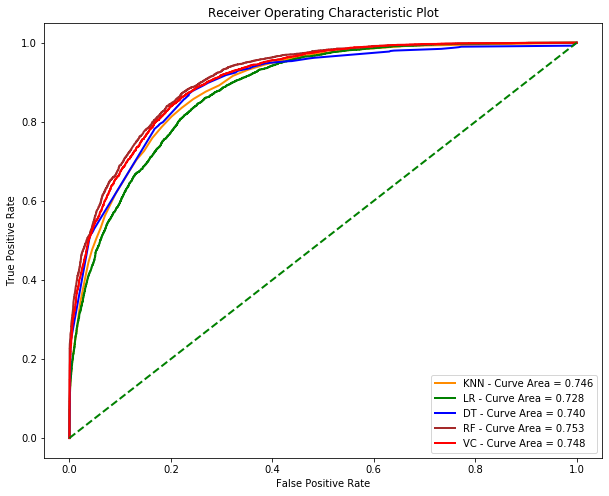

In [269]:
fpr1, tpr1, thr1 = roc_curve(y_test, knn_best_n.predict_proba(X_test)[:,1])
fpr2, tpr2, thr2 = roc_curve(y_test, reg.predict_proba(X_test)[:,1])
fpr3, tpr3, thr3 = roc_curve(y_test, best_model_dct.predict_proba(X_test)[:,1])
fpr4, tpr4, thr4 = roc_curve(y_test, best_model_rf.predict_proba(X_test)[:,1])
fpr5, tpr5, thr5 = roc_curve(y_test, vc.predict_proba(X_test)[:,1])
#auc = auc(fpr, tpr)
auc1 = roc_auc_score(y_test, y_pred_knn_best)
auc2 = roc_auc_score(y_test, y_pred_reg_default)
auc3 = roc_auc_score(y_test, y_pred_dct_best)
auc4 = roc_auc_score(y_test, y_pred_rf_best)
auc5 = roc_auc_score(y_test, y_pred_vc)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label="KNN - Curve Area = %0.3f" % auc1)
plt.plot(fpr2, tpr2, color='green', lw=lw, label="LR - Curve Area = %0.3f" % auc2)
plt.plot(fpr3, tpr3, color='blue', lw=lw, label="DT - Curve Area = %0.3f" % auc3)
plt.plot(fpr4, tpr4, color='brown', lw=lw, label="RF - Curve Area = %0.3f" % auc4)
plt.plot(fpr5, tpr5, color='red', lw=lw, label="VC - Curve Area = %0.3f" % auc5)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
plt.legend(loc="lower right")
plt.show()

***
Spośród analizowanych modeli najlepszy okazał się Las Losowy. Jednocześnie pod względem <i>accuracy</i> jak i <i>AUC,</i><br>
który jest przedstawiony na wykresie powyżej. Równocześnie proces tuningu hiperparametrów był najbardziej czasłochołnny właśnie<br> dla tego modelu. 


***